**Анализ сервиса аренды самокатов GoFast**

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

* без подписки
* абонентская плата отсутствует;
* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

**Описание данных**
**Пользователи — users_go.csv**

* user_id — уникальный идентификатор пользователя
* name — имя пользователя
* age — возраст
* city — город
* subscription_type — тип подписки (free, ultra)

**Поeздки — rides_go.csv**

* user_id — уникальный идентификатор пользователя
* distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date — дата совершения поездки

**Подписки — subscriptions_go.csv**

* subscription_type — тип подписки
* minute_price — стоимость одной минуты поездки по данной подписке
* start_ride_price — стоимость начала поездки
* subscription_fee — стоимость ежемесячного платежа#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Шаг 1. Загрузка данных

### Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_riders = pd.read_csv('/datasets/rides_go.csv')
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')

### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [3]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data_riders.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
data_sub.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод**

Мы импортировали все нужные нам библиотеки. Открыли 3 датасета. Исходя из увиденного можно предварительно сказать что у нас 1565 пользователей, 18 тысяч поездок и информация по ценам и типам подписок, нет нулевых значений.

## Шаг 2. Предобработка данных

### Приведите столбец 'date' к типу даты pandas.

In [9]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d')

### Создайте новый столбец с номером месяца на основе столбца date.

In [10]:
data_riders['date'].dt.year.unique() #Проверим, за какие года предоставлены данные

array([2021])

In [11]:
data_riders['month'] = data_riders['date'].dt.month #Так как данные предоставленны только за 1 год, то ошибок не будет

### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [12]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
data_riders.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [14]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Пропусков не обнаружено**

**Поиск и обработка дубликатов**

In [15]:
data_users.duplicated().sum()

31

In [16]:
round (data_users.duplicated().sum()/len(data_users)*100, 2)

1.98

In [17]:
data_riders.duplicated().sum()

0

In [18]:
data_sub.duplicated().sum()

0

*Обнаружены явные дубликаты в файле с пользователями, они составляют почти 2% от общего объема дата фрейма. Так как они явные, предлагаю их просто удалить.*

In [19]:
data_users.drop_duplicates(inplace=True)

**Вывод**

Добавили столбец с месяцем.

Пропущенных данных в таблице нет. Имеющися дубликаты удалили, они составили 2% от общего числа датафрейма

## Шаг 3. Исследовательский анализ данных

### Опишите и визуализируйте общую информацию о пользователях и поездках:
* 3.1 частота встречаемости городов;

In [20]:
user_id_city = data_users['city'].value_counts()

In [21]:
user_id_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [22]:
user_id_city['procent'] = round(data_users['city'].value_counts() / user_id_city.sum()* 100, 2) 

In [23]:
user_id_city['procent']

Пятигорск         14.28
Екатеринбург      13.30
Ростов-на-Дону    12.91
Краснодар         12.58
Сочи              12.32
Омск              11.93
Тюмень            11.73
Москва            10.95
Name: city, dtype: float64

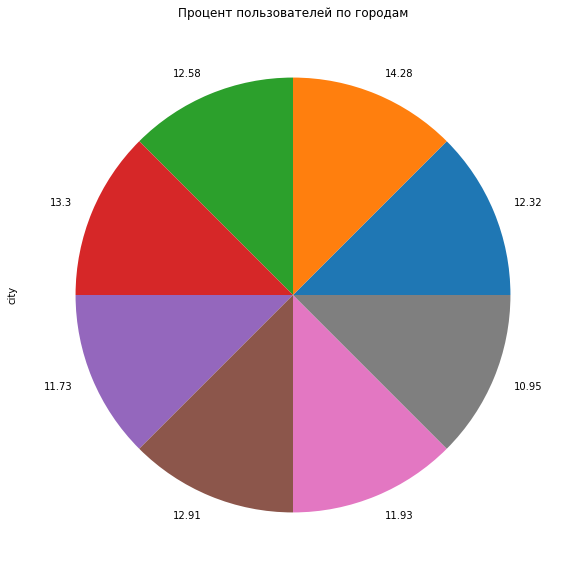

In [24]:
user_id_city['procent'].value_counts().plot(kind = 'pie', figsize=(10,10), title = 'Процент пользователей по городам');

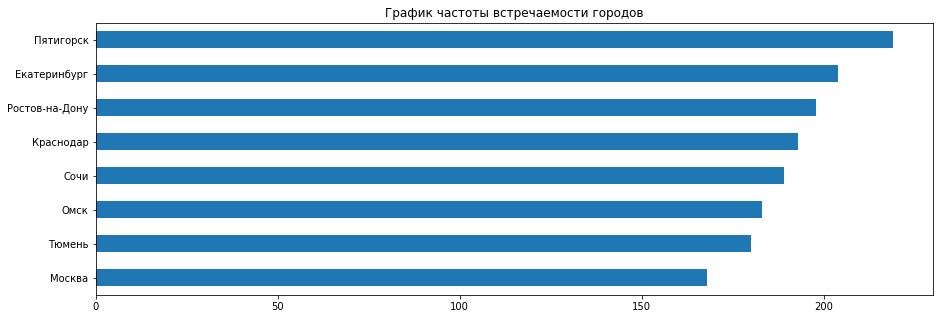

In [74]:
data_users['city'].value_counts(ascending= True).plot(
    kind= 'barh',
    figsize= (15,5),
    title= 'График частоты встречаемости городов',

)
plt.show()

* 3.2 соотношение пользователей с подпиской и без подписки;

In [25]:
subs = data_users['subscription_type'].value_counts()

In [26]:
subs

free     835
ultra    699
Name: subscription_type, dtype: int64

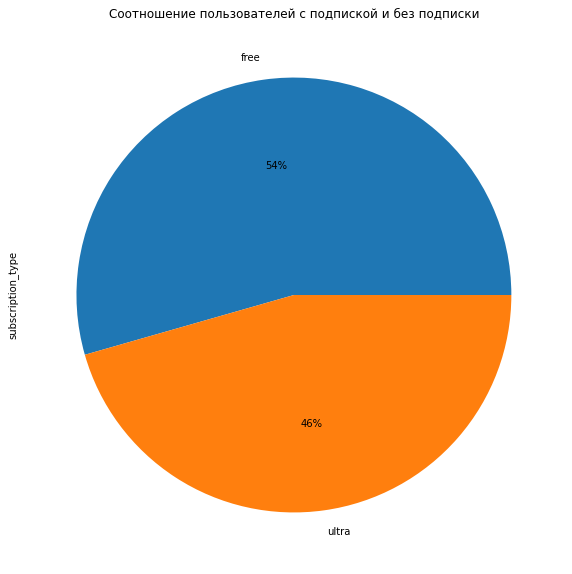

In [27]:
data_users['subscription_type'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%', figsize=(10,10), title = 'Cоотношение пользователей с подпиской и без подписки');

* 3.3 возраст пользователей;

In [28]:
data_users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

In [29]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

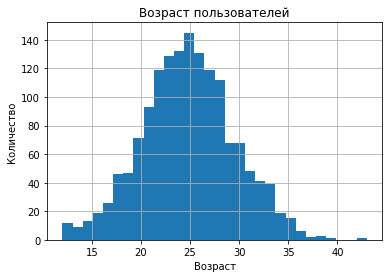

In [30]:
plt.hist(data_users['age'], bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid()
plt.show()

* 3.4 расстояние, которое пользователь преодолел за одну поездку;

In [31]:
round (data_riders['distance'].describe(), 2)

count    18068.00
mean      3070.66
std       1116.83
min          0.86
25%       2543.23
50%       3133.61
75%       3776.22
max       7211.01
Name: distance, dtype: float64

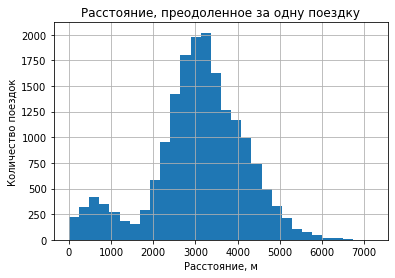

In [32]:
plt.hist(data_riders['distance'], bins = 30)
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.grid()
plt.show() 

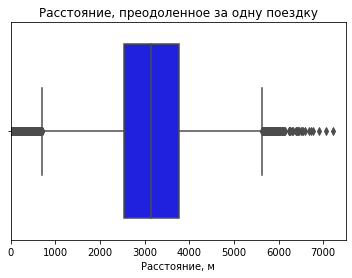

In [33]:
sns.boxplot(x=data_riders['distance'], color='blue')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 7500)

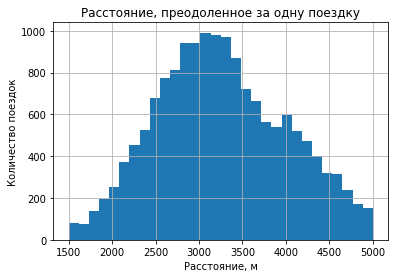

In [34]:
plt.hist(data_riders['distance'], bins = 30, range = (1500, 5000))
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.grid()
plt.show() 

* 3.5 продолжительность поездок.

In [35]:
round (data_riders['duration'].describe(), 2)

count    18068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

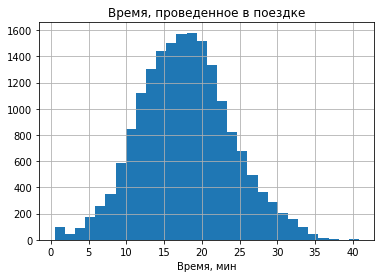

In [36]:
plt.hist(data_riders['duration'], bins = 30)
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, мин')
plt.grid()
plt.show() 

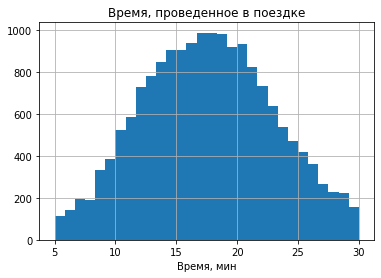

In [37]:
plt.hist(data_riders['duration'], bins = 30, range = (5, 30))
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, мин')
plt.grid()
plt.show() 

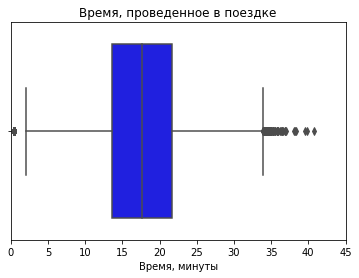

In [38]:
sns.boxplot(x = data_riders['duration'], color='blue')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 45)

**Вывод**

**Частота встречаемости городов**

Количество пользователей по городам распределено примерно одинаково, нет аномальных значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.

**Соотношение пользователей с подпиской и без подписки**

Пользователей, использующих бесплатную подписку - 835 человек (54% от общего числа пользователей), а у платной подписки 699 пользователей (46% от общего числа пользователей).

**Возраст пользователей**

Самыми младшими являются пользователи 12 лет.
Самыми старшими - 43.
Медианный возраст - почти 25 лет, что соответсвует среднему возрасту пользователю.

**Расстояние, которое пользователь преодолел за одну поездку**

Самая короткая дистанция - 860 метров
Самая длинная - 7 211 метров
В основном пользователи проезжают от 2 000 метров до 5 000 км.

**Продолжительность поездок**

Самые короткие поездки - 30 секунд (видимо тест самоката с последующей проблемой в нем).
Самая длинная поездка заняла  почти 41 минуту.
В основном же длительность поездки состовляет 7 - 27 минут.

## Шаг 4. Объединение данных

### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [39]:
data_users.shape[0]

1534

In [40]:
data_riders.shape[0]

18068

In [41]:
data_sub.shape[0]

2

In [42]:
data = data_users.merge(data_riders)

In [43]:
data = data.merge(data_sub)

In [44]:
data.shape[0]

18068

In [45]:
display (data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.


In [46]:
free = data.query("`subscription_type` == 'free'")

In [47]:
display (free)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [48]:
ultra = data.query("`subscription_type` == 'ultra'")

In [49]:
display (ultra)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [50]:
free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

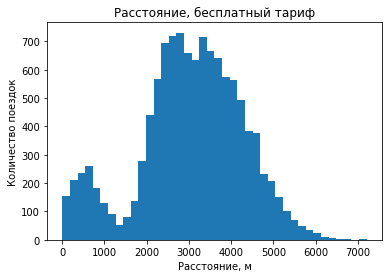

In [51]:
plt.hist(free['distance'], bins=40)
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

In [52]:
free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

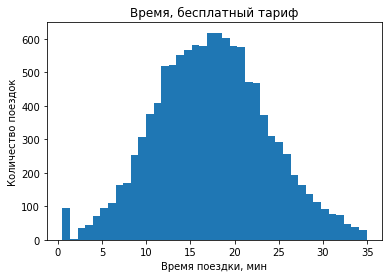

In [53]:
plt.hist(free['duration'], bins=40)
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.show()

In [54]:
ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

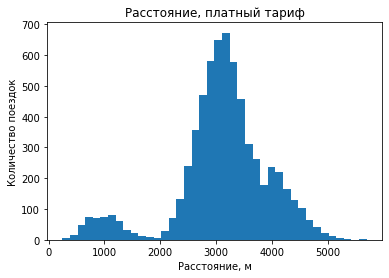

In [55]:
plt.hist(ultra['distance'], bins=40)
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

In [56]:
ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

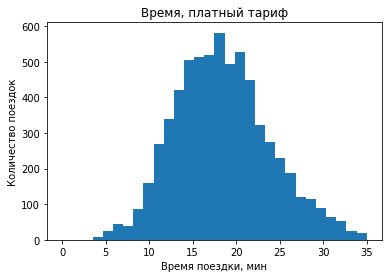

In [57]:
plt.hist(ultra['duration'], bins=30, range = (0, 35))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.show()

**Вывод**

Объединили данные о пользователях, поездках и тарифах в один датафрейм - data.

Выделили два датафрейма на основе нового датафрейма data:

* free - Информация о пользователях с бесплатным тарифом
* ultra - Информация о пользователях с платным тарифом

Визуализировали информацию о расстоянии и времени для каждого из тарифов.

* Для бесплатного тарифа время поездки составляет от 12 до 30 минут, и проезжают от 2000 метров до 5 000 метров. Медианное расстояния приходится на 3 000 метров.

*  Платный тариф. В основном время укладывается в промежуток от 12 до 27 минути проезжают от 2 500 метров до 4 000 метров.  Медианное расстояния приходится на 3 100 метров.

Пользователи с бесплатным тарифом в целом совершают чуть более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

## Шаг 5. Подсчёт выручки

### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [58]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [59]:
data.duplicated().sum()

0

In [60]:
data_agf = pd.pivot_table(data, index=['month', 'user_id'], values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len,
                                      'subscription_type' : min})

In [61]:
data_agf['duration'] = np.ceil(data_agf['duration'])

In [62]:
data_agf.isna().sum()

distance             0
duration             0
name                 0
subscription_type    0
dtype: int64

In [63]:
data_agf.duplicated().sum()

0

In [64]:
data_agf.rename(columns = {'name' : 'starts'}, inplace = True)

In [65]:
display (data_agf.sort_values(by='month'))

distance  duration  starts subscription_type
month user_id                                                  
1     1         7027.511294      42.0       2             ultra
      1061     12637.249630      42.0       3              free
      1063      3276.362299      10.0       1              free
      1064      5297.324649      15.0       1              free
      1065     14547.099333      97.0       4              free
...                     ...       ...     ...               ...
12    618       5269.450142      32.0       2             ultra
      619       2955.251037      17.0       1             ultra
      620       3972.842520      14.0       1             ultra
      600       3698.618505      14.0       1             ultra
      1534      2371.711192      16.0       1              free

[11331 rows x 4 columns]

### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Напомним, что: 
* без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;

* с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

In [66]:
def virucka(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['starts']
    else:
        return 'Ошибка'

In [67]:
data_agf['virucka_za_month'] = data_agf.apply(virucka, axis=1)

In [68]:
display (data_agf['virucka_za_month'])

month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
                  ...  
12     1525       322.0
       1526       234.0
       1528       138.0
       1532       428.0
       1534       178.0
Name: virucka_za_month, Length: 11331, dtype: float64

**Вывод**

* Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (data).

* Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

## Шаг 6. Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.**

H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

In [69]:
ultra_sub = ultra['duration'] 

free_sub = free['duration']

results = st.ttest_ind(ultra_sub, free_sub, alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Отвераем гипотезу о том, что время поездки пользователей на тарифе "ultra" равно времени поездки пользователей на тарифе "free".

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

**Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.**

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (distance) пользователей на подписке ultra < 3130 метров

In [70]:
ultra_dist = ultra['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(ultra_dist, interested_value, alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


**Вывод**

Мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе "ultra" не превышает 3130 метров.

### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H_0: Выручка (virucka_za_month) пользователей на подписке ultra = выручка (virucka_za_month) пользователей на подписке free

H_1: Выручка (virucka_za_month) пользователей на подписке ultra > выручка (virucka_za_month) пользователей на подписке free

In [71]:
ultra_per_mnth = data_agf.loc[data_agf.subscription_type == 'ultra', 'virucka_za_month'] 

free_per_mnth = data_agf.loc[data_agf.subscription_type == 'free', 'virucka_za_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.8130926188487286e-35
Отвергаем нулевую гипотезу


**Вывод**

Проверили гипотезу, соответственно, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
**Какой тест вам понадобился бы для проверки этой гипотезы?**

**Ответ:**
Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

* H0 : μ1 = μ2
* H1 : μ1 != μ2
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

**Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()**

## Общий вывод

Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Дальше проверили данные на пропуски, их не оказалось ни в одной таблице. Поменяли тип данных у столбца date из датафрейма data_riders к типу даты. Также добавили столбец month с номером месяца. И удалили дубликаты строк из датафрейма с пользователями.

Провели исследовательский анализ данных:

Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
Пользователей, использующих бесплатную подписку - 835 человек (54% от общего числа пользователей). В платной подписке 699 пользователей (46% от общего числа пользователей)

Самыми младшим являются пользователи 12 лет.
Самыми старшими - 43.
Медианный возраст - почти 25 лет, что соответсвует среднему возрасту пользователю.

Самая короткая дистанция - 860 метров
Самая длинная - 7 211 метров
В основном пользователи проезжают от 2 000 метров до 5 000 км.


Самые короткие поездки - 30 секунд (видимо тест самоката с последующей проблемой в нем).
Самая длинная поездка заняла  почти 41 минуту.
В основном же длительность поездки состовляет 7 - 27 минут.

Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

Для пользователей с ultra подпиской
Для пользователей с free подпиской

Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 12 до 30 минут, и проезжают от 2000 метров до 5 000 метров. Медианное расстояния приходится на 3 000 метров.

Платный тариф. В основном время укладывается в промежуток от 12 до 27 минути проезжают от 2 500 метров до 4 000 метров.  Медианное расстояния приходится на 3 100 метров.

Пользователи с бесплатным тарифом в целом совершают чуть более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

Проверили гипотезы:

**Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе**

* Отвергли нулевую гипотезу

**Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку** 

* Не удалось отвергнуть нулевую гипотезу

**Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки** 

* Отвергли нулевую гипотезу

**Рекомендации по развитию аренды самокатов:**

Судя по количеству пользователей бизнес не совсем давно стартанул. Первой моей рекомендацией изучить топ1 рынка услугу в каждом заявленном городе. Почему они лучше и крупнее "нас"? 

Второе: если нет или не было не каких акций, то предлагаю запустить одну из них, что-то на подадобии "при покупке подписки, пользуя самокат более 20 минут кажая следующая минута стоит в 2 раза дешевле. 
Так же можно добавить реферальную ссылку: если ты пришел от "друга" то ему дается условно неделя подписки, а тебе две недели.

Третье: если это активный пользователь бесплатной версии, то добавить ему так называемых "челенжей". Условно если он проехал 50 км давать ему статус "новобранец", от этого например меняется цена в подписке, и сама подписка стоит дешевле. Ну и соотственно чем больше он проехал, тем больше скидка.